# Network analysis for coauthors - collaborativeness and its impact on species description

This looks at how a person who is more collaborative may result in greater species described.

**Not used in main text.**

In [1]:
%load_ext autoreload
%autoreload 2

from src.util import load_coauthor_nx, ddir, fn_nodes, get_spp_df

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
(G, nodes) = load_coauthor_nx() # abstracted into src

N nodes 391 ; N not nodes: 360
Proportion who did not coauthor 47.9 %

Name: 
Type: Graph
Number of nodes: 391
Number of edges: 510
Average degree:   2.6087


In [3]:
fn_nodes

'../data/2019-05-23-ascher-bee-data/v3/2020-11-10-Apoidea-describer_2.csv'

In [4]:
# Data wrangling
spp = get_spp_df()
spp = spp[spp.status == "Valid species"].drop(columns=['status', 'date'])
spp_counts = spp.groupby('full_name_of_describer').agg('count')
spp_counts.columns = ['collab_spp_N']

spp_counts_valid = spp.groupby('full_name_of_describer').agg('count')
spp_counts_valid.columns = ['collab_ns_spp_N']
spp_counts = spp_counts.merge(spp_counts_valid, "outer", on="full_name_of_describer")

auth = pd.read_csv(fn_nodes)[["full.name.of.describer", "ns_spp_N", "syn_spp_N", 
     "spp_N", "spp_N_1st_auth", "spp_N_1st_auth_s", "spp_N_last_auth"]]

spp_counts = spp_counts.merge(auth, how="outer", left_on="full_name_of_describer", right_on="full.name.of.describer")

nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient="index")
n = nodes[['degree', 'betweenness', 'eigenvector']].reset_index()
n.columns = ['full_name_of_describer', 'degree', 'betweenness', 'eigenvector']


spp_counts = spp_counts.merge(n, "outer", left_on = "full.name.of.describer", right_on="full_name_of_describer")
spp_counts = spp_counts[spp_counts['collab_spp_N'].notna()]
spp_counts = spp_counts[spp_counts['degree'].notna()]

/home/ejysoh/miniconda3/envs/msc/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (22,30,60,61,65,86,89,106,117) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/mnt/c/_dev/msc/thesis/2020-08-31-jsa-type-v2-ch3-coauth/src/util.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spp = spp[~spp['duplicated']][


In [5]:
def reg_xy(x, y, xlab, ylab):

    # statsmodels
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

    # plot
    plt.figure(figsize=(5, 5))
    plt.rc('font', size=12)
    ax = sns.regplot(x=x, y=y)
    ax.set(xlabel=xlab, ylabel=ylab)

                            OLS Regression Results                            
Dep. Variable:           collab_spp_N   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     591.4
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           7.04e-77
Time:                        18:37:42   Log-Likelihood:                -1358.6
No. Observations:                 348   AIC:                             2721.
Df Residuals:                     346   BIC:                             2729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7930      0.814     -2.203      0.0

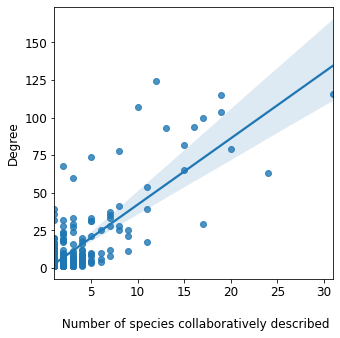

In [6]:
x = spp_counts['degree']
y = spp_counts['collab_spp_N']
xlab = '\n Number of species collaboratively described'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:                  spp_N   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     26.88
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.69e-07
Time:                        18:37:43   Log-Likelihood:                -2535.2
No. Observations:                 348   AIC:                             5074.
Df Residuals:                     346   BIC:                             5082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.6663     23.930     -0.655      0.5

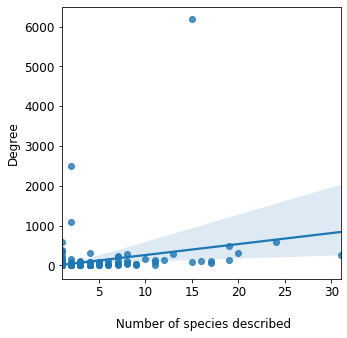

In [7]:
x = spp_counts['degree']
y = spp_counts['spp_N']
xlab = '\n Number of species described'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:       spp_N_1st_auth_s   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     26.03
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           5.55e-07
Time:                        18:37:43   Log-Likelihood:                -2535.5
No. Observations:                 348   AIC:                             5075.
Df Residuals:                     346   BIC:                             5083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.5674     23.955     -0.650      0.5

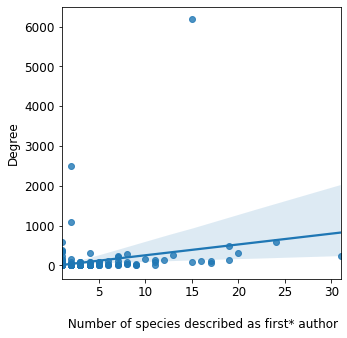

In [8]:
x = spp_counts['degree']
y = spp_counts['spp_N_1st_auth_s']
xlab = '\n Number of species described as first* author'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

                            OLS Regression Results                            
Dep. Variable:        spp_N_last_auth   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     77.54
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           6.35e-17
Time:                        18:37:44   Log-Likelihood:                -655.50
No. Observations:                 348   AIC:                             1315.
Df Residuals:                     346   BIC:                             1323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0795      0.108     -0.736      0.4

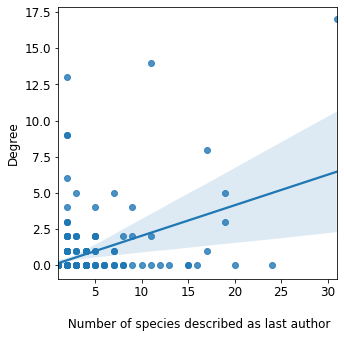

In [9]:
x = spp_counts['degree']
y = spp_counts['spp_N_last_auth']
xlab = '\n Number of species described as last author'
ylab = 'Degree'

reg_xy(x, y, xlab, ylab)

In [10]:
spp_counts.columns

Index(['collab_spp_N', 'collab_ns_spp_N', 'full.name.of.describer', 'ns_spp_N',
       'syn_spp_N', 'spp_N', 'spp_N_1st_auth', 'spp_N_1st_auth_s',
       'spp_N_last_auth', 'full_name_of_describer', 'degree', 'betweenness',
       'eigenvector'],
      dtype='object')